In [1]:
# Loading neccesary packages:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer, OrdinalEncoder, OneHotEncoder
# experiment class
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

#

import warnings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# Meeting the data
We're going to start by loading the data and taking first look on it as usual. For the column names we have great dictionary file in our dataset location so we can get familiar with them in no time.

In [2]:
# Loading datasets.

train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [4]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

In [5]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

* Id column looks useless we can safely drop it from both. I'm going to save our target (SalePrice) on different variable so we can use it in future.

In [6]:
# Dropping unnecessary Id column.

train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [7]:
# Backing up target variables and dropping them from train data.

y = train.SalePrice.reset_index(drop=True)
X = train.drop('SalePrice', axis=1)

# Analysis Time!
Ok the short inspection at the beginning give us some hints how should we move from here. I'm going to play with the data we have while analysing the data at the same time. With this way I hope we can get the data in better shape while digging deeper into it.

We're going to start with basic correlation table here. I dropped the top part since it's just mirror of the other part below. With this table we can understand some linear relations between different features.

### Observations:
* There's strong relation between overall quality of the houses and their sale prices.
* Again above grade living area seems strong indicator for sale price.
* Garage features, number of baths and rooms, how old the building is etc. also having effect on the price on various levels too.
* There are some obvious relations we gonna pass like total square feet affecting how many rooms there are or how many cars can fit into a garage vs. garage area etc.
* Overall condition of the house seems less important on the pricing, it's interesting and worth digging.

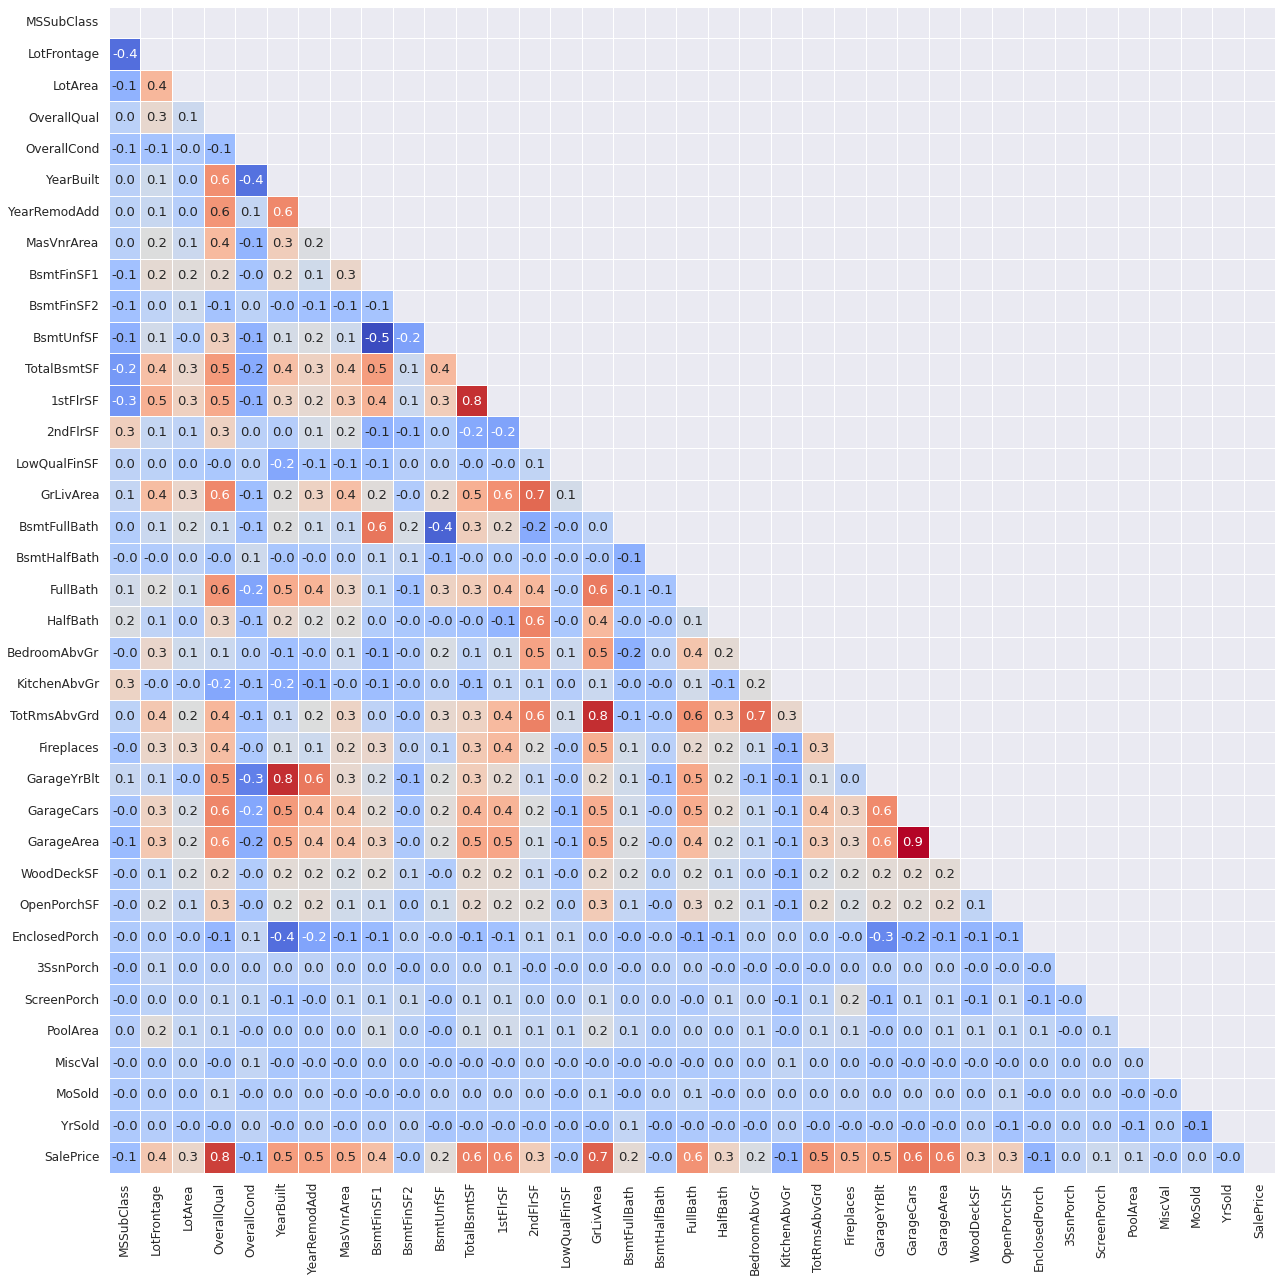

In [8]:
# Display numerical correlations (pearson) between features on heatmap.

sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

# delete unnecesory varieble 
del correlation_train, mask


* **I'm going to merge the datasets here before we start editing it so we don't have to do these operations twice. Let's call it features since it has features only. So our data has 2919 observations and 79 features to begin with...**

In [9]:
# Merging train test features for engineering.

features = pd.concat([X, test]).reset_index(drop=True)
print(features.shape)

(2919, 79)


# Missing Data
Alright, first of all we need detect missing values, then wee need to get rid of them for the next steps of our work. So let's list our missing values and visualize them:

In [10]:
def missing_percentage(df):
    
    """A function for returning missing ratios."""
    total = df.isnull().sum().sort_values(ascending=False)
    
    return pd.concat([total, (total / len(df) * 100)], axis=1, keys=['Total', 'Percent'])[total!=0]

* **That's quite a lot! No need to panic though we got this. If you look at the data description given to us we can see that most of these missing data actually not missing, it's just means house doesn't have that specific feature, we can fix that easily...**

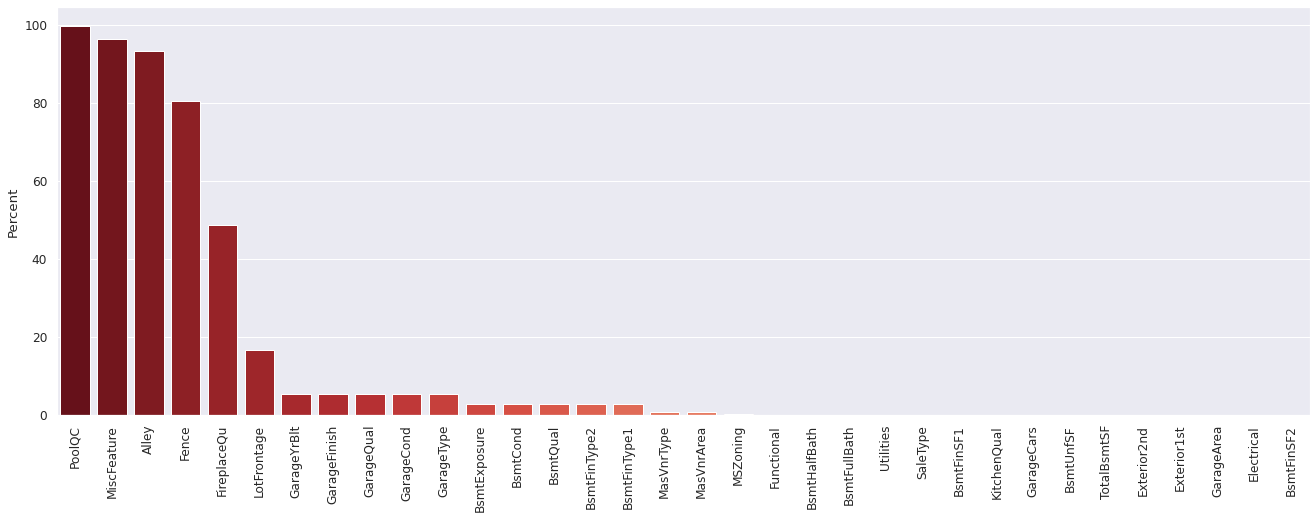

In [11]:
# Checking 'NaN' values.

missing = missing_percentage(features)

fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

del missing

# Ok this is how we gonna fix most of the missing data:
1. First we fill the NaN's in the columns where they mean 'None' so we gonna replace them with that,
2. Then we fill numerical columns where missing values indicating there is no parent feature to measure, so we replace them with 0's.
3. Even with these there are some actual missing data, by checking general trends of these features we can fill them with most frequent value(with mode).
4. MSZoning part is little bit tricky I choose to fill them with most common type of the related MSSubClass type. It's not perfect but at least we decrease randomness a little bit.
4. Again we fill the Lot Frontage with similar approach.

In [12]:
# List of 'NaN' including columns where NaN's mean's none.

none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

# List of 'NaN' including columns where NaN's mean's 0.

zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# List of 'NaN' including columns where NaN's actually missing gonna replaced with mode.

most_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities', 'MSZoning'
]

# Multivariate feature imputation method
# for ref => https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation

regg_cols = ['LotFrontage']#,'MSZoning']


In [13]:
# impute missing value with Column transformer

missing_value_preprocessor = ColumnTransformer(
    transformers=[
        # imputation
        ('none_imputer', SimpleImputer(fill_value= 'none', strategy='constant'), none_cols),
        ('zero_imputer', SimpleImputer(fill_value= 0, strategy='constant'), zero_cols),
        ('most_imputer', SimpleImputer(strategy='most_frequent'), most_cols),
        # experimental class imputation => Multivariate feature imputation
        ('regg_features', IterativeImputer(max_iter=10, random_state=0), regg_cols),
    ],
    remainder = 'passthrough',
)

In [14]:
col_tr_col = none_cols + zero_cols + most_cols
col_tr_col = col_tr_col + [i for i in features.columns if i not in col_tr_col]

features = pd.DataFrame(
    missing_value_preprocessor.fit_transform(features),
    columns = col_tr_col)
features = features.convert_dtypes()

# Feature Engineering
Ok this is the part where we dig deeper into our completed dataset. There are no missing values so we're good to go! I'm going to start with grouping some values, these values are really rare and I'm thinking they do not add much, so if they appear less than 10 times in our observations they get into 'Other' group.

In [15]:
# Transforming rare values(less than 10) into one group.

others = [
    'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Heating', 'Electrical', 'Functional', 'SaleType'
]

for col in others:
    mask = features[col].isin(
        features[col].value_counts()[features[col].value_counts() < 10].index)
    features[col][mask] = 'Other'

In [16]:
def show_box(y, df):
    
    '''A function for displaying categorical variables.'''
    
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()
    
    for i, j in zip(df.select_dtypes(include=['object']).columns, axes):
        
        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()



# Categorical Data
We already checked some of the numerical features with correlation heatmap but what about categorical values? We want to see relations between categorical data and sale price. Boxplots seems decent way to inspect this type of relation. We're also going to sort them by the median value of that group so we can see the importances in descending order.


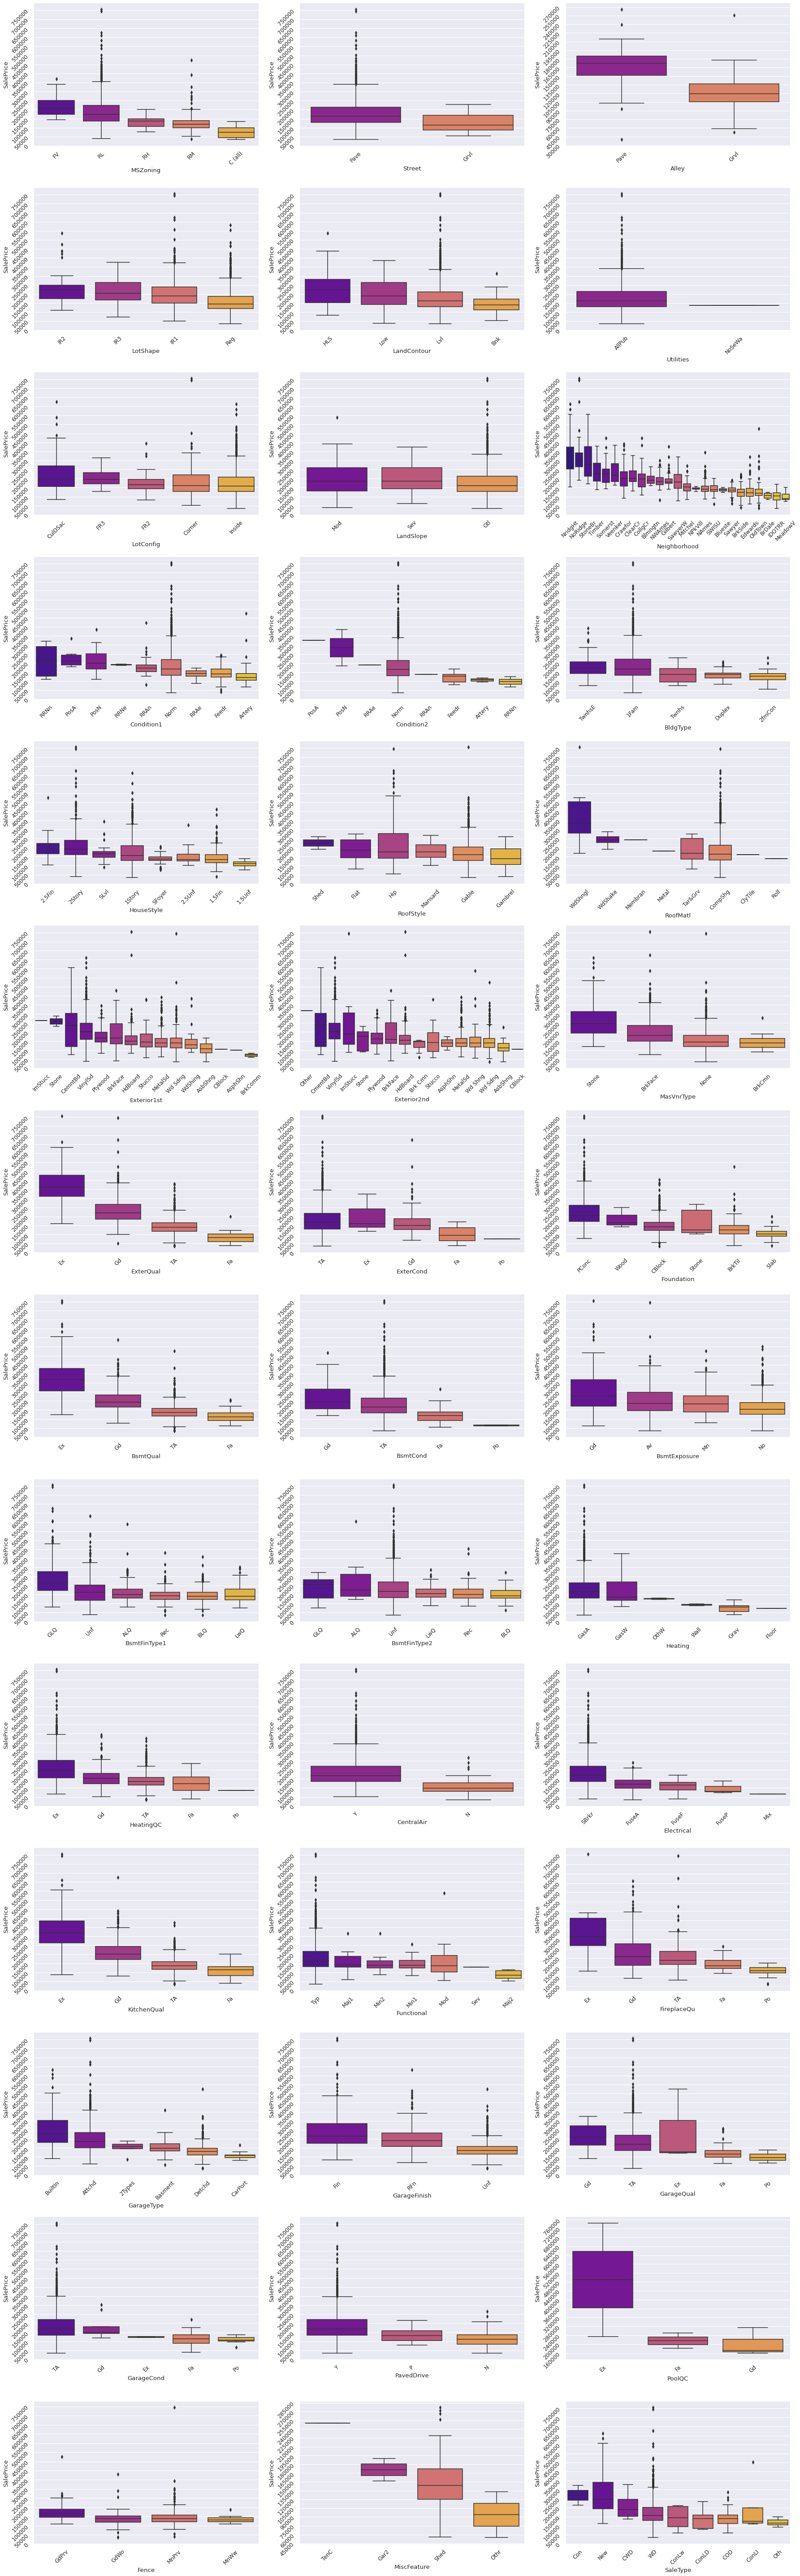

In [17]:
# Displaying sale prices vs. categorical values:

show_box('SalePrice', train)

# Encoding categorical features

In [18]:
# Converting some of the categorical values to numeric ones.
ordi_encode_cols = ['Neighborhood', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageCond', 'GarageQual']

categorical_value_preprocessor = ColumnTransformer(
    transformers=[('ordinal_encoder', OrdinalEncoder(), ordi_encode_cols)],
    remainder = 'passthrough',
)

features = pd.DataFrame(categorical_value_preprocessor.fit_transform(features),
             columns = (ordi_encode_cols + [i for i in features.columns if i not in ordi_encode_cols]))
features = features.convert_dtypes()


# Numeric Data
There are many numeric features the inspect, one of the best ways to see how they effect sale prices is scatter plots. We're also plotting polynomial regression lines to see general trend. With this way we can understand the numerical values and their importance on sale price, also it's really helpful to spot outliers.

### Observations:
* OverallQual; It's clearly visible that sale price of the house increases with overall quality. This confirms the correlation in first table we did at the beginning. (Pearson corr was 0.8)

* OverallCondition; Looks like overall condition is left skewed where most of the houses are around 5/10 condition. But it doesn't effect the price like quality indicator...

* YearBuilt; Again new buildings are generally expensive than the old ones.

* Basement; General table shows bigger basements are increasing the price but I see some outliers there...

* GrLivArea; This feature is pretty linear but we can spot two outliers effecting this trend. There are some huge area houses with pretty cheap prices, there might be some reason behind it but we better drop them.

* SaleDates; They seem pretty unimportant on sale prices, we can drop them...

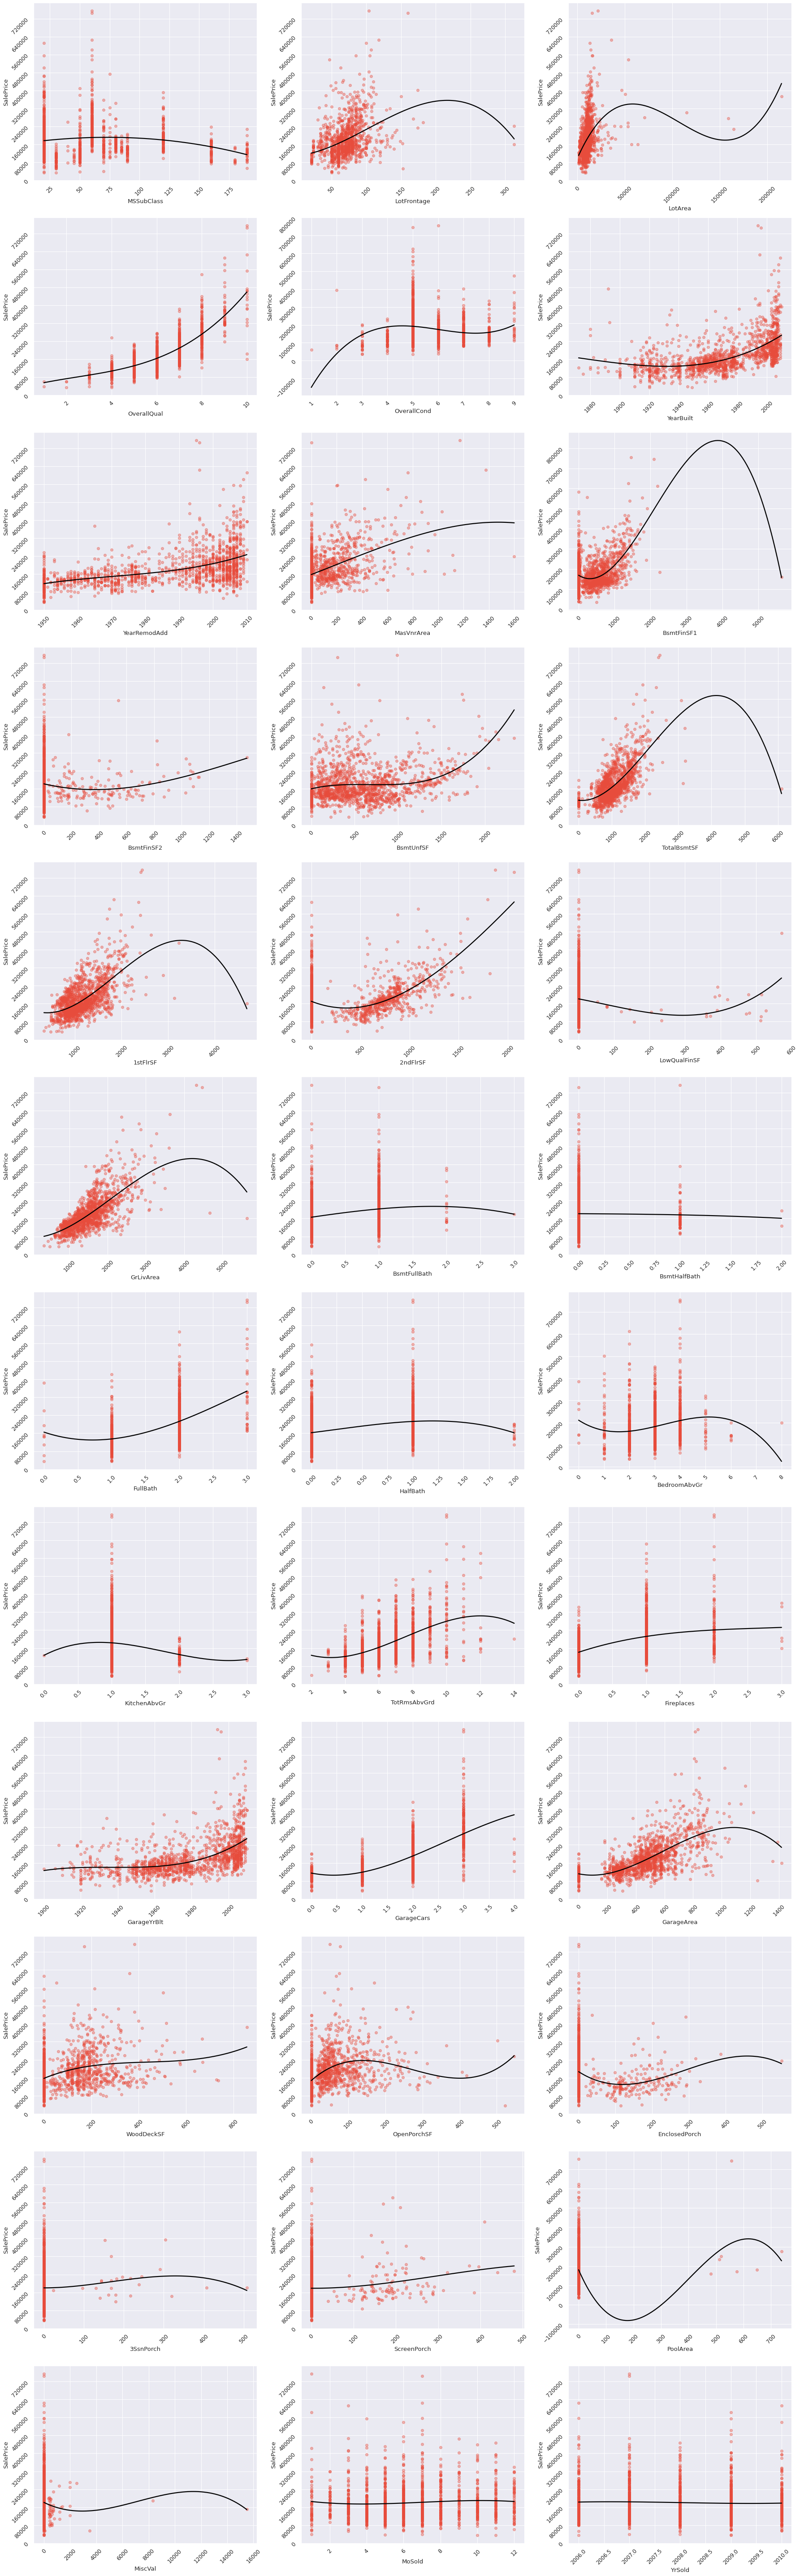

In [19]:
# Plotting numerical features with polynomial order to detect outliers by eye.

def show_reg(y, df):
    fig, axes = plt.subplots(12, 3, figsize=(25, 80))
    axes = axes.flatten()
    
    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):

        sns.regplot(x=i,
                    y=y,
                    data=df,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()

show_reg('SalePrice', train)

# Outliers
Ok here we're going to drop some outliers we detected them just above, this part is kinda subjective and can try different approaches or implement some automatic outlier detection methods like isolation forests.

In [20]:
# Dropping outliers after detecting them by eye.

features = features.join(y)

features = features.drop(features[(features['GrLivArea'] > 4000)
                                  & (features['SalePrice'] < 200000)].index)
features = features.drop(features[(features['GarageArea'] > 1200)
                                  & (features['SalePrice'] < 250000)].index)
features = features.drop(features[(features['TotalBsmtSF'] > 3000)
                                  & (features['SalePrice'] < 320000)].index)
features = features.drop(features[(features['1stFlrSF'] < 3000)
                                  & (features['SalePrice'] > 600000)].index)
features = features.drop(features[(features['1stFlrSF'] > 3000)
                                  & (features['SalePrice'] < 200000)].index)

y = features['SalePrice']
y.dropna(inplace=True)
features.drop(columns='SalePrice', inplace=True)


# Creating New Features
Ok in this part we going to create some features, these can improve our modelling. I went with basic approach by merging some important indicators and making them stronger.

In [21]:
# Creating new features  based on previous observations. There might be some highly correlated features now. You cab drop them if you want to...

features['TotalSF'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                       features['1stFlrSF'] + features['2ndFlrSF'])
features['TotalBathrooms'] = (features['FullBath'] +
                              (0.5 * features['HalfBath']) +
                              features['BsmtFullBath'] +
                              (0.5 * features['BsmtHalfBath']))

features['TotalPorchSF'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                            features['EnclosedPorch'] +
                            features['ScreenPorch'] + features['WoodDeckSF'])

features['YearBlRm'] = (features['YearBuilt'] + features['YearRemodAdd'])

# Merging quality and conditions.

features['TotalExtQual'] = (features['ExterQual'] + features['ExterCond'])
features['TotalBsmQual'] = (features['BsmtQual'] + features['BsmtCond'] +
                            features['BsmtFinType1'] +
                            features['BsmtFinType2'])
features['TotalGrgQual'] = (features['GarageQual'] + features['GarageCond'])
features['TotalQual'] = features['OverallQual'] + features[
    'TotalExtQual'] + features['TotalBsmQual'] + features[
        'TotalGrgQual'] + features['KitchenQual'] + features['HeatingQC']

# Creating new features by using new quality indicators.

features['QualGr'] = features['TotalQual'] * features['GrLivArea']
features['QualBsm'] = features['TotalBsmQual'] * (features['BsmtFinSF1'] +
                                                  features['BsmtFinSF2'])
features['QualPorch'] = features['TotalExtQual'] * features['TotalPorchSF']
features['QualExt'] = features['TotalExtQual'] * features['MasVnrArea']
features['QualGrg'] = features['TotalGrgQual'] * features['GarageArea']
features['QlLivArea'] = (features['GrLivArea'] -
                         features['LowQualFinSF']) * (features['TotalQual'])
features['QualSFNg'] = features['QualGr'] * features['Neighborhood']


In [22]:
# Observing the effects of newly created features on sale price.

def srt_reg():
    fig, axes = plt.subplots(5, 3, figsize=(25, 40))
    axes = axes.flatten()

    new_features = [
        'TotalSF', 'TotalBathrooms', 'TotalPorchSF', 'YearBlRm',
        'TotalExtQual', 'TotalBsmQual', 'TotalGrgQual', 'TotalQual', 'QualGr',
        'QualBsm', 'QualPorch', 'QualExt', 'QualGrg', 'QlLivArea', 'QualSFNg'
    ]
    merged = features.join(y)
    merged = merged[new_features+['SalePrice']].astype('float')

    for i, j in zip(new_features, axes):

        sns.regplot(x=i,
                    y='SalePrice',
                    data=merged,
                    ax=j,
                    order=3,
                    ci=None,
                    color='#e74c3c',
                    line_kws={'color': 'black'},
                    scatter_kws={'alpha':0.4})
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=10))

        plt.tight_layout()


# Checking New Features
Well... They look decent enough, I hope these can help us building strong models. I also wanted to add some more basic features for having specific feature or not. This approach was widely accepted by community so I see no harm to add them.

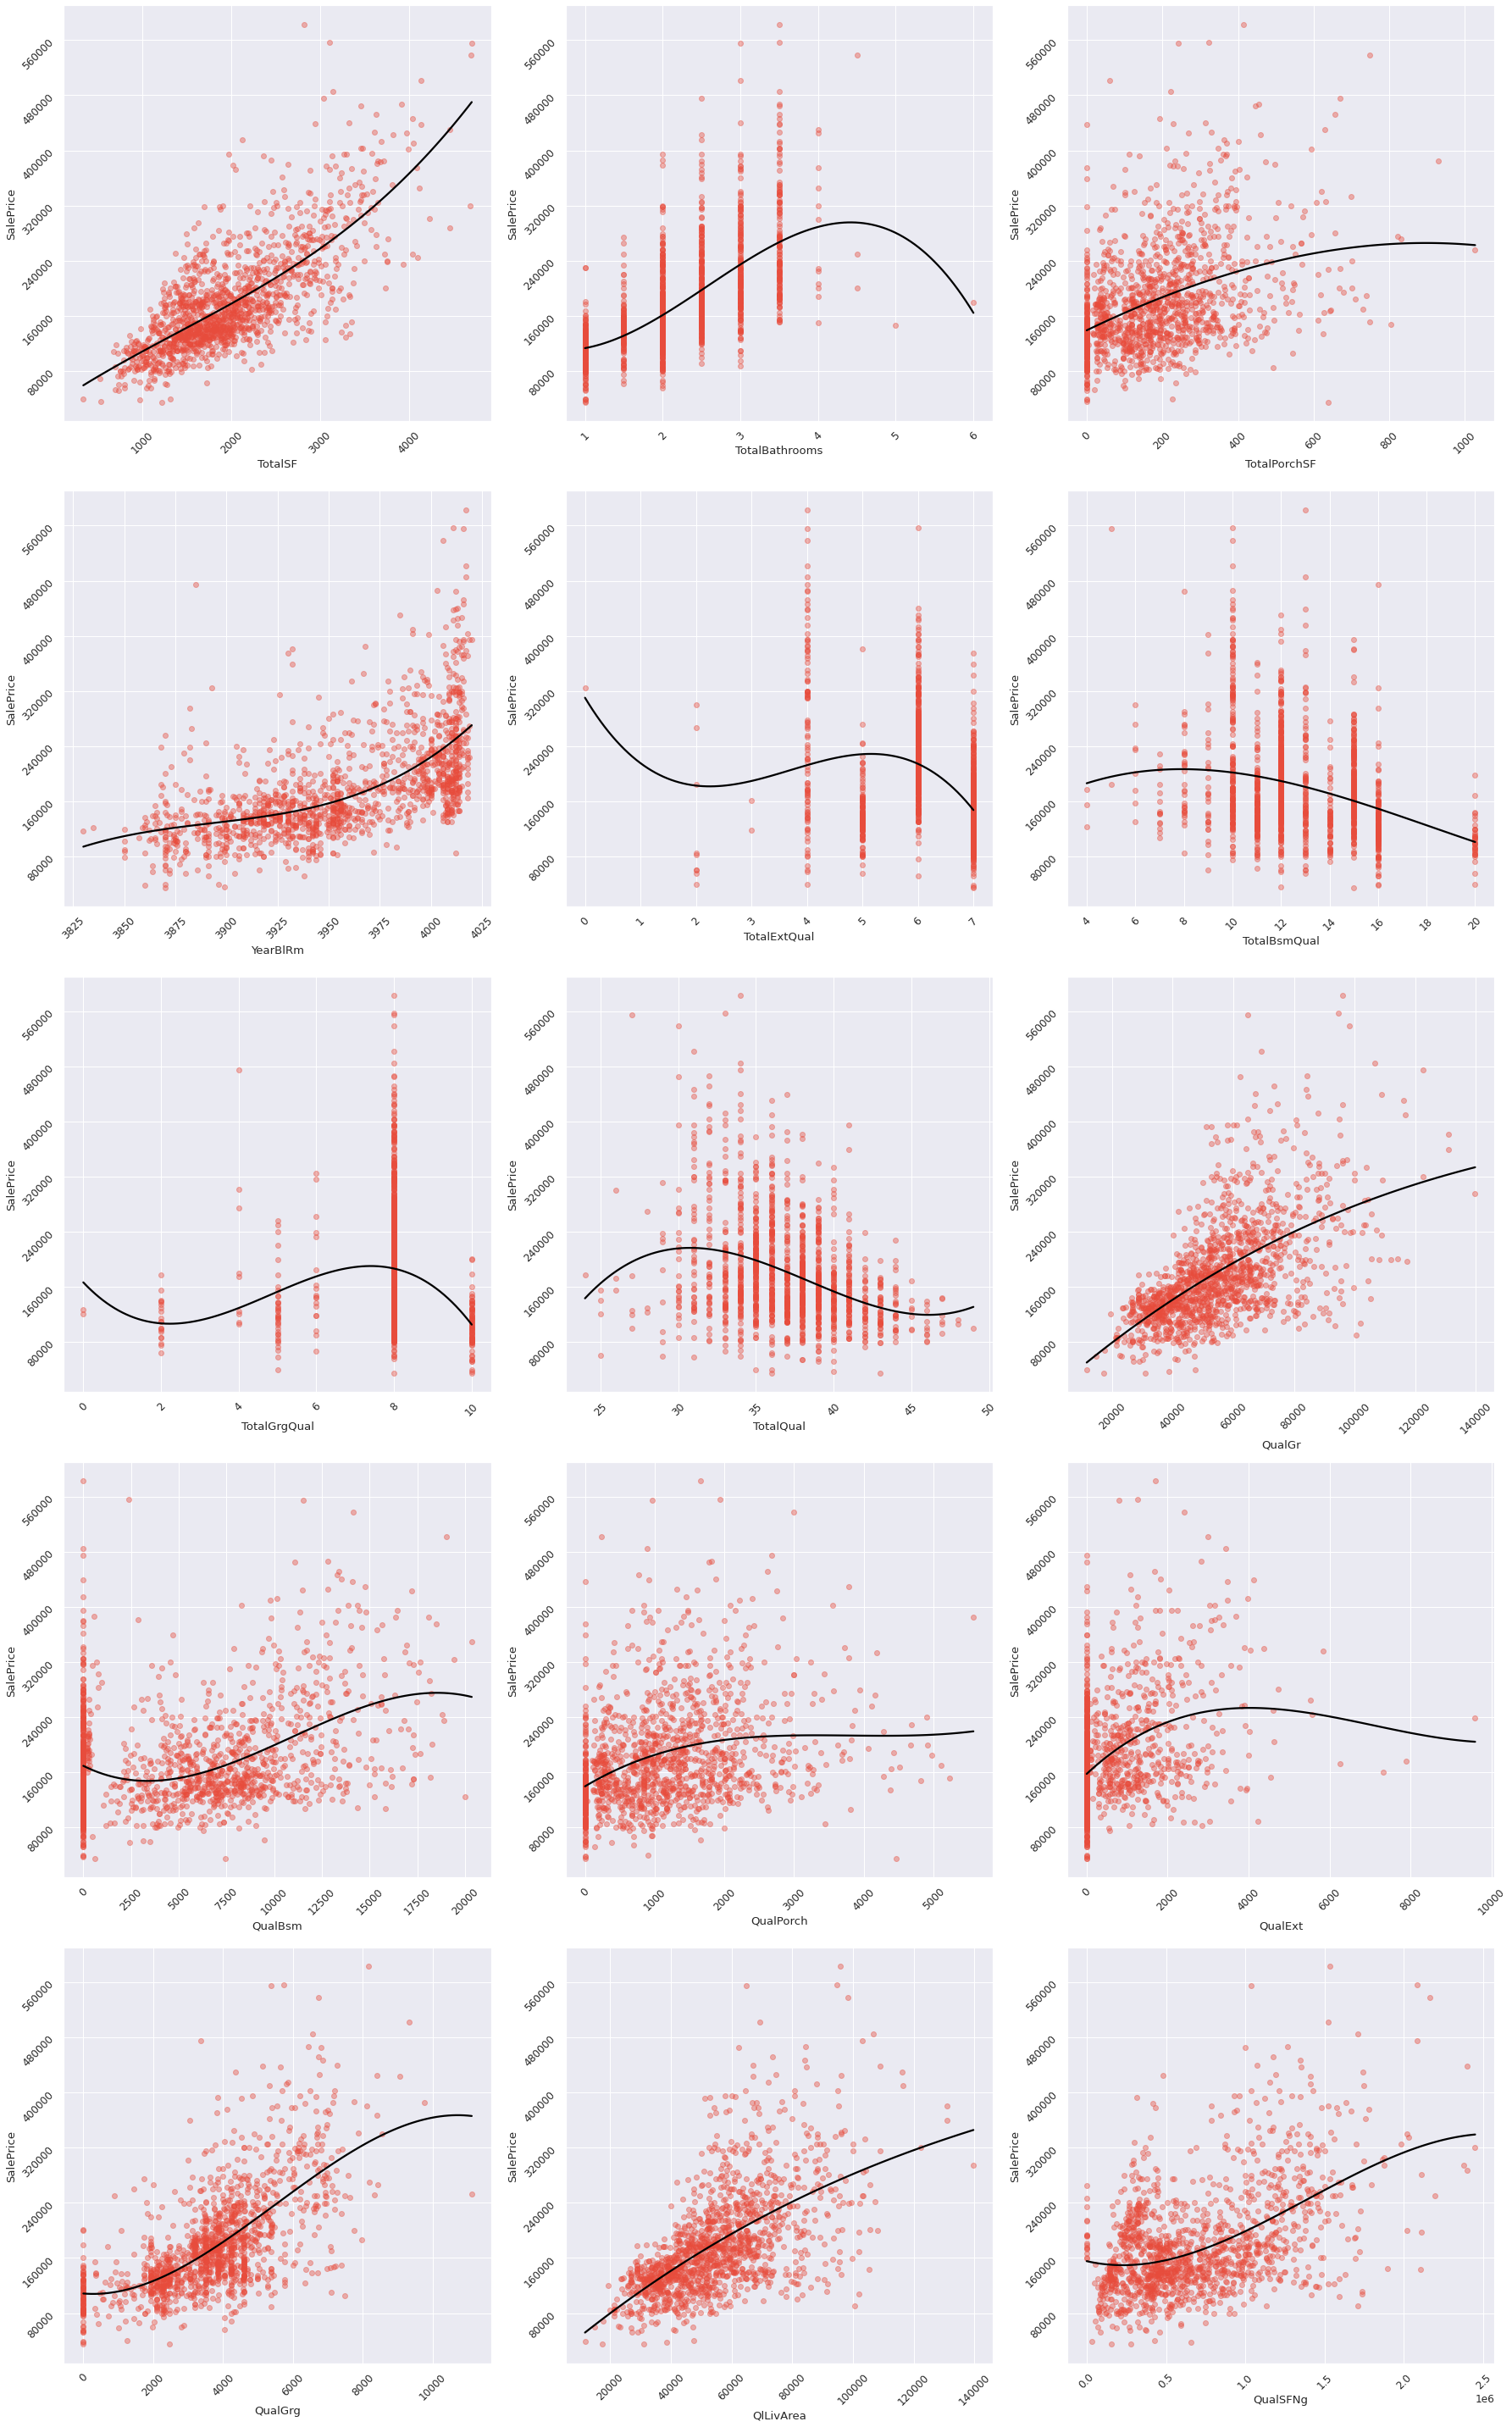

In [23]:
srt_reg()

In [24]:
# Creating some simple features.

features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x: 1
                                                     if x > 0 else 0)
features['HasGarage'] = features['QualGrg'].apply(lambda x: 1 if x > 0 else 0)
features['HasBsmt'] = features['QualBsm'].apply(lambda x: 1 if x > 0 else 0)
features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1
                                                        if x > 0 else 0)
features['HasPorch'] = features['QualPorch'].apply(lambda x: 1 if x > 0 else 0)

**Here we dropping some unnecessary features had their use in feature engineering or not needed at all. Obviously it's subjective but I feel they don't add much to model. Then we one hot encode the categorical data left so everything will be prepared for the modelling.**

In [25]:
# Features to drop:

to_drop = [
    'Utilities',
    'PoolQC',
    'YrSold',
    'MoSold',
    'ExterQual',
    'BsmtQual',
    'GarageQual',
    'KitchenQual',
    'HeatingQC',
]

# Dropping features.

features.drop(columns=to_drop, inplace=True)

# OneHotEncoding

In [26]:
features = pd.get_dummies(data=features,columns= features.select_dtypes('string').columns)

# Transforming the Data
Some of the continious values are not distributed evenly and not fitting on normal distribution, we can fix them by using couple transformation approaches. We're going to use power tranformer here, again it's widely used by community and I want to thank them all for their great work.

In [27]:
# Numerical features we worked on which seems highly skewed but we filter again anyways...

skewed = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'MiscVal'
]

In [28]:

power_column_preprocessor = ColumnTransformer(
    transformers=[('power_tranform', PowerTransformer(standardize=False), skewed)],
    remainder = 'passthrough',
)

features = pd.DataFrame(power_column_preprocessor.fit_transform(features),
             columns = (skewed + [i for i in features.columns if i not in skewed]))

<AxesSubplot:xlabel='QualGr', ylabel='SalePrice'>

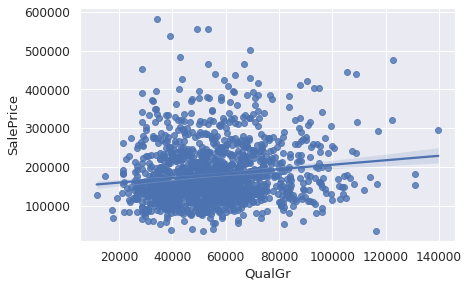

In [29]:
sns.regplot(x='QualGr',y='SalePrice',data=features.join(y).astype('float'))
#features.convert_dtypes()

# Double Check
Before we move to modelling I want to take one last look to the data we processed. Everyting seems in order, not missing datas, values are numerical etc. Our feature engineered data is present...

Just want to check how transformed data correlates with sale prices before we move on and it looks decent.

Again I wanted to check our target value distribution and it seems little skewed. We can fix this by applying log transformation so our models can perform better.

In [30]:
# Separating train and test set.

train = features.iloc[:len(y), :]
test = features.iloc[len(train):, :]

In [31]:
a = train.join(y).astype('float')
correlations = a.corrwith(a['SalePrice']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
correlations.sort_values('Abs Corr',ascending=False).head()


0  Abs Corr
OverallQual     0.192034  0.192034
TotalSF         0.186738  0.186738
TotalBathrooms  0.178004  0.178004
GrLivArea       0.171795  0.171795
GarageCars      0.169101  0.169101

# Modelling
Well then, it's time to do some modelling! First of all I wanted to thank kaggle community for loads of examples inspired me. Especially Alex Lekov's great script and Serigne's stacked regressions approach were great guides for me!

Let's start with loading packages needed and then we set our regressors. The regressors I'm going to use here are:

Ridge,
Lasso,
Elasticnet,
Support Vector Regression
I'm going to apply robust scaler on these before we run them because they really get effected by outliers.
Gradient Boosting Regressor
LightGBM Regressor
XGBoost Regressor
These don't need scaling in my opinion so we just go as it is
Hist Gradient Boosting Regressor
This is just for experimenting, it's still experimental on sklearn anyways
Tweedie Regressor
This regressor added in latest version of sklearn and I wanted to try it. It's generalized linear model with a Tweedie distribution. We gonna use power of 0 because we expecting normal target distribution but you can try this or other generalized models like poisson regressor or gamma regressor.
I tried to tune models by using Optuna package, that part is not added here.

In [32]:
# Loading neccesary packages for modelling.

from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor # This is for stacking part, works well with sklearn and others...

In [33]:
from sklearn.compose import TransformedTargetRegressor

tt = TransformedTargetRegressor(regressor=SVR(),
                                func=np.log, inverse_func=np.exp)


kf = KFold(10, random_state=42)
# Some parameters for ridge, lasso and elasticnet.

alphas_alt = [0.01, 13, 15.5, 15.6, 15.7, 15.8, 15.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [
    0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.001
]
e_alphas = [
    0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007
]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

# ridge_cv

ridge = make_pipeline(RobustScaler(), RidgeCV(
    alphas=alphas_alt,
    cv=kf,
))

# lasso_cv:

lasso = make_pipeline(
    RobustScaler(),
    LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kf))

# elasticnet_cv:

elasticnet = make_pipeline(
    RobustScaler(),
    ElasticNetCV(max_iter=1e7,
                 alphas=e_alphas,
                 cv=kf,
                 random_state=42,
                 l1_ratio=e_l1ratio))

# svr

svr = make_pipeline(
    RobustScaler(),
    SVR(
        C=20,
        gamma=0.00017,
))


gbr = GradientBoostingRegressor(n_estimators=2900,
                                learning_rate=0.0161,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=17,
                                loss='huber',
                                random_state=42)

# lightgbm:

lightgbm = LGBMRegressor(objective='regression',
                         learning_rate=0.00721,
                         )
'''n_estimators=3500,
                         num_leaves=5,
                         max_bin=163,
                         bagging_fraction=0.35711,
                         n_jobs=-1,
                         bagging_seed=42,
                         feature_fraction_seed=42,
                         bagging_freq=7,
                         feature_fraction=0.1294,
                         min_data_in_leaf=8)
'''
# xgboost:

xgboost = XGBRegressor(
    learning_rate=0.0139,
    )
'''n_estimators=4500,
    max_depth=4,
    min_child_weight=0,
    subsample=0.7968,
    colsample_bytree=0.4064,
    nthread=-1,
    scale_pos_weight=2,
    seed=42,
)'''



# stacking regressor:

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr,
                                            xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

scores = cross_validate(
    lasso,
    train,
    np.log1p(y),
    cv=kf,
    scoring=['r2','neg_root_mean_squared_error'],
    return_train_score=True,
    n_jobs=-1)

pd.DataFrame(scores).mean()

fit_time                             0.473463
score_time                           0.006627
test_r2                              0.920838
train_r2                             0.933918
test_neg_root_mean_squared_error    -0.109666
train_neg_root_mean_squared_error   -0.100991
dtype: float64

In [34]:
def model_check(X, y, estimators, cv):
    
    ''' A function for testing multiple estimators.'''
    
    model_table = pd.DataFrame()

    row_index = 0
    for est, label in zip(estimators, labels):

        MLA_name = label
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv=cv,
                                    scoring='neg_root_mean_squared_error',
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index, 'Train RMSE'] = -cv_results[
            'train_score'].mean()
        model_table.loc[row_index, 'Test RMSE'] = -cv_results[
            'test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test RMSE'],
                            ascending=True,
                            inplace=True)

    return model_table

In [35]:
# Setting list of estimators and labels for them:

estimators = [ridge, lasso, elasticnet, gbr, svr,
             # xgboost, lightgbm
             ]
labels = [
    'Ridge', 'Lasso', 'Elasticnet', 'GradientBoostingRegressor',
    'SVR', #'XGBRegressor', 'LGBMRegressor', 
]

# Model Results
Allright, our results are here. Looks like our models did pretty close to each other, there might be some overfitting models and we can try to fix them by tuning but it was computationally expensive for me and since I'm going to stack and blend the models I think we can leave them as it is. We already added our models to stacking regression and set the XGBoost as meta regressor we can continue with stacking

In [36]:
# Executing cross validation.

raw_models = model_check(train, np.log1p(y), estimators, kf)
display(raw_models.style.background_gradient(cmap='summer_r'))